In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class GDLinearReagression:

    def __init__(self, n_feature = 1, n_iter = 2000, lr = 1e-3, tol = None) :
        self.n_iter = n_iter    # maximum iteration steps
        self.lr = lr            # learning rate
        self.tol = tol          # Threshold for stopping iteration
        self.W = np.random.random(n_feature + 1) * 0.05 # model parameters
        self.loss = []           # loss value

    def _loss(self, y, y_pred):
        return np.mean((y_pred - y) ** 2) / y.size
    
    def _gradient(self, X, y, y_pred):
        return (y_pred-y) @ X / y.size
    
    def _preprocess_data(self, X):
        m, n = X.shape
        X_ = np.empty([m, n+1])
        X_[:, 0] = 1
        X_[:, 1:] = X 
        return X_
    
    def _predict(self, X):
        return X @ self.W
    
    def predict(self, X):
        X = self._preprocess_data(X)
        return X @ self.W
    
    def batch_update(self, X, y):

        if self.tol is not None:
            loss_old = np.inf

        for iter in range(self.n_iter):
            y_pred = self._predict(X)
            loss = self._loss(y, y_pred)
            #print(loss)
            self.loss.append(loss)

            if self.tol is not None:
                if np.abs(loss_old - loss) < self.tol:
                    break
                loss_old = loss

            grad = self._gradient(X, y, y_pred)
            # self.W -= self.lr * grad
            self.W = self.W - self.lr * grad
    
    def train(self, X_train, y_train):
        X_train = self._preprocess_data(X_train)
        self.batch_update(X_train, y_train)

    def plot_loss(self):
        plt.plot(self.loss)
        plt.grid()
        plt.show()

1


/home/hgj/anaconda3/envs/sdm274/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_12516/4196320841.py:42: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(loss_old - loss) < self.tol:
/tmp/ipykernel_12516/4196320841.py:11: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2) / y.size
/tmp/ipykernel_12516/4196320841.py:14: RuntimeWarning: overflow encountered in matmul
  return (y_pred-y) @ X / y.size
/tmp/ipykernel_12516/4196320841.py:24: RuntimeWarning: invalid value encountered in matmul
  return X @ self.W


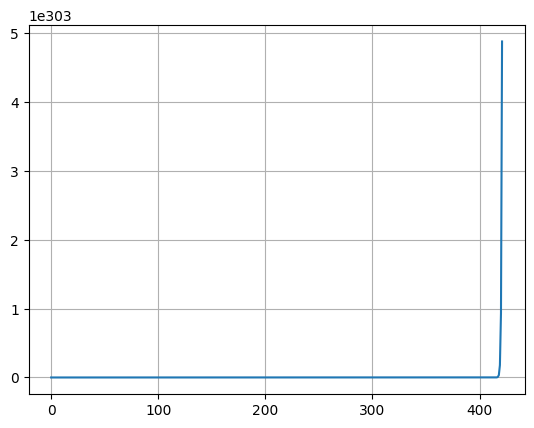

Learned weights are [nan nan]


In [3]:
X_train = np.arange(100).reshape(100,1)
a, b = 1, 10
y_train = a * X_train + b 
y_train = y_train.flatten()
_, n_feature = X_train.shape
print(n_feature)

gd_lreg_1 = GDLinearReagression(n_feature = n_feature, n_iter = 3000, lr = 0.001, tol = 0.00001)
gd_lreg_1.train(X_train, y_train)
y_pred = gd_lreg_1.plot_loss()
print(f'Learned weights are {gd_lreg_1.W}')